<a href="https://colab.research.google.com/github/tannu64/Concurrent-Web-Scraping-and-Data-Analysis-of-Popular-News-Websites/blob/main/Concurrent_Web_Scraping_and_Data_Analysis_of_Popular_News_Websites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**
In this project, you'll build a simple Python program using Google Colab that performs the following tasks:

**Web Scraping (Multithreading):**

Scrape headlines and article links from multiple news websites (e.g., BBC, CNN, Reuters) using multithreading for faster data collection.

**Text Analysis (Multiprocessing):**

Perform sentiment analysis and keyword extraction from the scraped headlines using multiprocessing to handle data in parallel.

**Data Storage and Visualization:**

Save the processed data into CSV format and visualize trends (e.g., most common keywords or sentiment distribution) using Matplotlib.

**ThreadPoolExecutor and ProcessPoolExecutor:**

Use executors to manage the threads and processes seamlessly for different stages of the project.

**Key Features**

Learn to efficiently scrape multiple websites concurrently.
Understand and compare multithreading and multiprocessing.
Utilize simple Python libraries like **requests, BeautifulSoup, concurrent.futures, pandas, and matplotlib.**

Work entirely in Google Colab with no additional setup.
This project is beginner-friendly but comprehensive enough to help you solidify your understanding of multithreading, multiprocessing, and concurrent programming.

Fetching headlines...
Error scraping Reuters: 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/world/
Total headlines fetched: 122
Analyzing sentiments...
Data saved to 'headlines_analysis.csv'


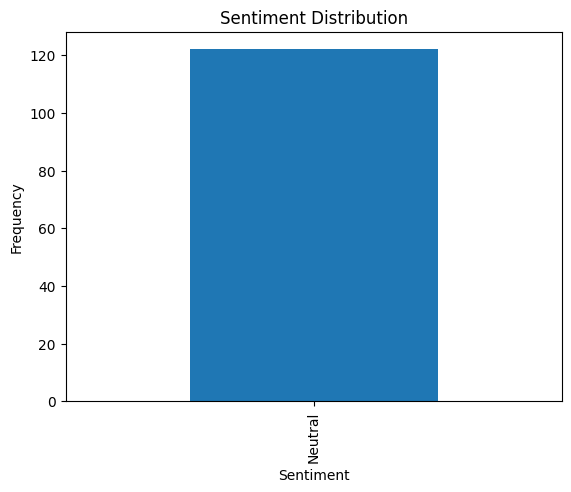

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from textblob import TextBlob
import multiprocessing

# Step 1: Define the websites to scrape
WEBSITES = {
    "BBC": "https://www.bbc.com/news",
    "CNN": "https://edition.cnn.com/world",
    "Reuters": "https://www.reuters.com/world/"
}

# Step 2: Function to scrape headlines
def scrape_headlines(website, url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        if website == "BBC":
            headlines = [(a.text.strip(), a["href"]) for a in soup.find_all("a", class_="gs-c-promo-heading") if a.text.strip()]
        elif website == "CNN":
            headlines = [(a.text.strip(), f"https://edition.cnn.com{a['href']}") for a in soup.find_all("a", class_="container__link") if a.text.strip()]
        elif website == "Reuters":
            headlines = [(a.text.strip(), a["href"]) for a in soup.find_all("a", class_="Text__text__") if a.text.strip()]
        else:
            headlines = []

        return {"website": website, "headlines": headlines}
    except Exception as e:
        print(f"Error scraping {website}: {e}")
        return {"website": website, "headlines": []}

# Step 3: Perform sentiment analysis
def analyze_sentiment(headline):
    analysis = TextBlob(headline)
    return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

# Step 4: Scrape headlines using multithreading
def fetch_all_headlines():
    results = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(scrape_headlines, website, url) for website, url in WEBSITES.items()]
        for future in futures:
            results.append(future.result())
    return results

# Step 5: Analyze headlines using multiprocessing
def process_headlines(headlines):
    with multiprocessing.Pool() as pool:
        sentiments = pool.map(analyze_sentiment, [h[0] for h in headlines])
    return sentiments

# Step 6: Save and visualize the data
def save_and_visualize(data):
    df = pd.DataFrame(data, columns=["Website", "Headline", "Link", "Sentiment"])
    df.to_csv("headlines_analysis.csv", index=False)
    print("Data saved to 'headlines_analysis.csv'")

    # Plot sentiment distribution
    sentiment_counts = df["Sentiment"].value_counts()
    sentiment_counts.plot(kind="bar")
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.show()

# Main function
def main():
    print("Fetching headlines...")
    scraped_data = fetch_all_headlines()

    all_headlines = []
    for site_data in scraped_data:
        website = site_data["website"]
        for headline, link in site_data["headlines"]:
            all_headlines.append((website, headline, link))

    print(f"Total headlines fetched: {len(all_headlines)}")

    print("Analyzing sentiments...")
    sentiments = process_headlines([h[1] for h in all_headlines])

    final_data = [(website, headline, link, sentiment) for (website, headline, link), sentiment in zip(all_headlines, sentiments)]

    save_and_visualize(final_data)

if __name__ == "__main__":
    main()


# **Enhanced Code with more features**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Fetching headlines...
Error scraping Reuters: 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/world/
Total headlines fetched: 122
Data saved to 'headlines_analysis.csv'


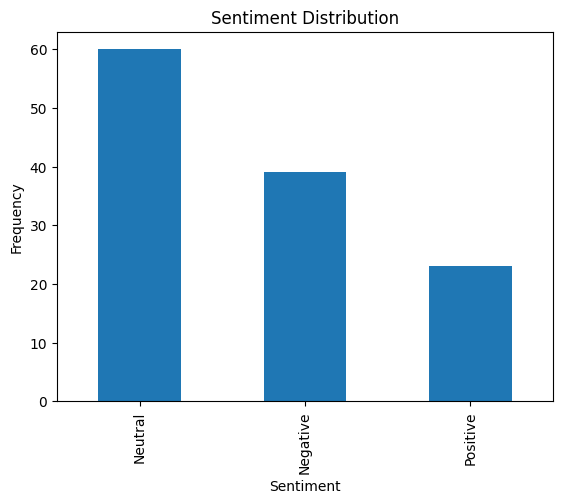

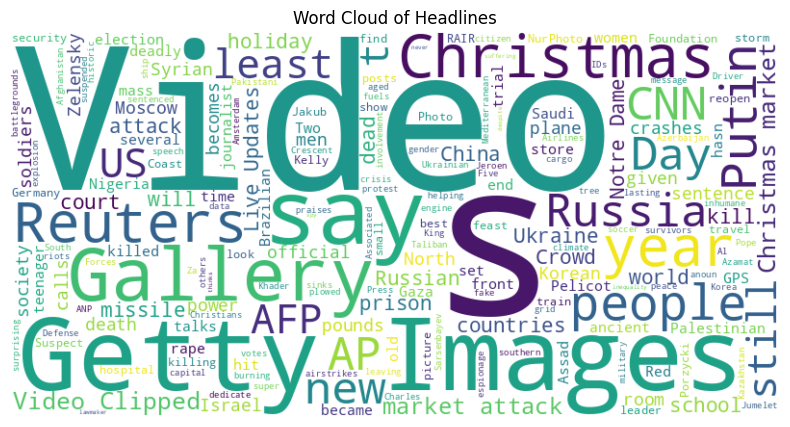

Top Keywords:
in: 35
Video: 20
the: 19
of: 18
to: 18
and: 18
a: 14
Images: 13
•: 13
for: 12


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')

# Step 1: Define the websites to scrape
WEBSITES = {
    "BBC": "https://www.bbc.com/news",
    "CNN": "https://edition.cnn.com/world",
    "Reuters": "https://www.reuters.com/world/"
}

# Step 2: Function to scrape headlines
def scrape_headlines(website, url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        if website == "BBC":
            headlines = [(a.text.strip(), a["href"]) for a in soup.find_all("a", class_="gs-c-promo-heading") if a.text.strip()]
        elif website == "CNN":
            headlines = [(a.text.strip(), f"https://edition.cnn.com{a['href']}") for a in soup.find_all("a", class_="container__link") if a.text.strip()]
        elif website == "Reuters":
            headlines = [(a.text.strip(), a["href"]) for a in soup.find_all("a", class_="Text__text__") if a.text.strip()]
        else:
            headlines = []

        return {"website": website, "headlines": headlines}
    except Exception as e:
        print(f"Error scraping {website}: {e}")
        return {"website": website, "headlines": []}

# Step 3: Perform sentiment analysis using VADER
def analyze_sentiment_vader(headline):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(headline)["compound"]
    return "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"

# Step 4: Scrape headlines using multithreading
def fetch_all_headlines():
    results = []
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(scrape_headlines, website, url) for website, url in WEBSITES.items()]
        for future in futures:
            results.append(future.result())
    return results

# Step 5: Save and visualize the data
def save_and_visualize(data):
    df = pd.DataFrame(data, columns=["Website", "Headline", "Link", "Sentiment"])
    df.to_csv("headlines_analysis.csv", index=False)
    print("Data saved to 'headlines_analysis.csv'")

    # Plot sentiment distribution
    sentiment_counts = df["Sentiment"].value_counts()
    sentiment_counts.plot(kind="bar")
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.show()

    # Generate a word cloud of headlines
    all_headlines = " ".join(df["Headline"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_headlines)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Headlines")
    plt.show()

    # Display top keywords
    words = all_headlines.split()
    common_words = Counter(words).most_common(10)
    print("Top Keywords:")
    for word, count in common_words:
        print(f"{word}: {count}")

# Main function
def main():
    print("Fetching headlines...")
    scraped_data = fetch_all_headlines()

    all_headlines = []
    for site_data in scraped_data:
        website = site_data["website"]
        for headline, link in site_data["headlines"]:
            sentiment = analyze_sentiment_vader(headline)
            all_headlines.append((website, headline, link, sentiment))

    print(f"Total headlines fetched: {len(all_headlines)}")

    save_and_visualize(all_headlines)

if __name__ == "__main__":
    main()
